In [22]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from matplotlib.colors import ListedColormap

In [23]:
# a = [[randint(60, 100), randint(0, 100)] for i in range(42)]
# b = [[randint(0, 60), randint(0, 60)] for i in range(42)]

# k1 = np.array(a)
# k2 = np.array(b)

# x1 = [randint(70, 100) for i in range(42)]
# y1 = [randint(0, 100) for i in range(42)]

# x2 = [randint(0, 50) for i in range(42)]
# y2 = [randint(0, 45) for i in range(42)]


rgen = np.random.RandomState(47)

x1 = rgen.normal(loc=80.0, scale=10.0, size=42)
y1 = rgen.normal(loc=50.0, scale=25.0, size=42)

x2 = rgen.normal(loc=30.0, scale=8.0, size=42)
y2 = rgen.normal(loc=30.0, scale=8.0, size=42)


k1 = np.array([x1, y1])
k2 = np.array([x2, y2])

k1

array([[ 71.51990524,  93.05906358,  89.24207966,  86.40411801,
         69.45263017,  97.97760715,  69.8721325 ,  88.23623324,
         77.05349647,  74.07529428,  66.06272941,  91.04179672,
         70.67659714,  70.56843563,  84.36606232,  87.9495827 ,
         87.19533153,  80.87662257,  66.77251594,  80.51793979,
         61.65204742,  83.27496473,  84.76237234,  81.68428646,
         71.37588669,  89.07444498,  84.22889373,  57.87571047,
         63.45794259,  83.21375264,  75.37325646,  69.19249795,
         76.8622586 ,  69.82148113,  84.994227  ,  79.70053759,
         80.47090105,  68.29141238,  60.87472709,  82.7154222 ,
         83.22065299,  68.68999841],
       [ 53.9465285 ,  26.9900611 ,  31.35225303,  44.89467276,
         99.15962055,  70.5836528 ,  23.56290049,  63.77623415,
         56.85308126,  59.18241161,  54.89723336,  47.16178234,
         -2.22317653,  26.5133863 ,  56.89618462,  60.69017143,
         60.41865831,  57.54384784,   2.0834059 ,  45.49818595,
   

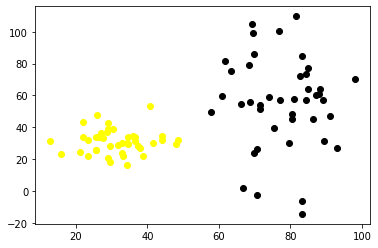

In [24]:
plt.scatter(k2[0], k2[1], color='yellow', marker='o', label='class 2')
plt.scatter(k1[0], k1[1], color='black', marker='o', label='class 1')
plt.show()

In [25]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        print(self.w_.shape)

        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

In [26]:
print(k1)
print(k1.T)

[[ 71.51990524  93.05906358  89.24207966  86.40411801  69.45263017
   97.97760715  69.8721325   88.23623324  77.05349647  74.07529428
   66.06272941  91.04179672  70.67659714  70.56843563  84.36606232
   87.9495827   87.19533153  80.87662257  66.77251594  80.51793979
   61.65204742  83.27496473  84.76237234  81.68428646  71.37588669
   89.07444498  84.22889373  57.87571047  63.45794259  83.21375264
   75.37325646  69.19249795  76.8622586   69.82148113  84.994227
   79.70053759  80.47090105  68.29141238  60.87472709  82.7154222
   83.22065299  68.68999841]
 [ 53.9465285   26.9900611   31.35225303  44.89467276  99.15962055
   70.5836528   23.56290049  63.77623415  56.85308126  59.18241161
   54.89723336  47.16178234  -2.22317653  26.5133863   56.89618462
   60.69017143  60.41865831  57.54384784   2.0834059   45.49818595
   81.74110331 -14.39206781  63.94215533 109.72552245  51.57556901
   57.38017173  73.54485088  49.31131177  75.52330267  -6.15127166
   39.8193628  104.79281421 100.1774

In [27]:
k1 = k1.T
k2 = k2.T

In [28]:
X = np.zeros((84, 2))
X[:42] = k1
X[42:] = k2

X /= 100

In [29]:
y = np.ones((84), dtype=int)
y[:42] = -1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [30]:
rgen = np.random.RandomState(1)
rgen.shuffle(X)
rgen.shuffle(y)

In [31]:
ppn = Perceptron()
ppn.fit(X, y)

(3,)


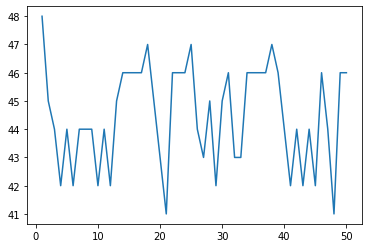

In [32]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.show()

In [33]:
x1_min, x1_max = 0, 100
x2_min, x2_max = 0, 100
resol = 0.01 

cmap = ListedColormap(['red', 'blue'])
k1 = k1.T
k2 = k2.T

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, resol),
    np.arange(x2_min, x2_max, resol)
)

Z = ppn.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T
)

Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.scatter(k2[0], k2[1], color='yellow', marker='o', label='class 2')
plt.scatter(k1[0], k1[1], color='black', marker='o', label='class 1')
plt.show()